<a href="https://www.kaggle.com/code/lalit7881/bnpl-risk-prediction-model-accuracy-100?scriptVersionId=295960229" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/buy-now-pay-later-bnpl-dataset/bnpl_dataset.csv


## Title:
Buy Now, Pay Later (BNPL) Transactions Dataset

## Description:
This dataset captures real-world usage patterns of Buy Now, Pay Later (BNPL) services, focusing on how consumers adopt short-term, interest-free installment payment options. It includes detailed information on customer demographics, purchase behavior, transaction values, installment plans, repayment timelines, defaults or delays, and merchant categories.

The dataset is designed to help analyze consumer credit behavior, risk assessment, and financial inclusion trends in digital payments. It enables data-driven insights into spending habits, repayment reliability, fraud detection, and the impact of BNPL on customer purchasing power. Researchers, fintech startups, and analysts can use this dataset for predictive modeling, customer segmentation, credit scoring, and policy evaluation in the evolving alternative lending ecosystem.

## Import dataset

In [2]:
df = pd.read_csv("/kaggle/input/buy-now-pay-later-bnpl-dataset/bnpl_dataset.csv")

In [3]:
df.head()

,Transaction_ID,Customer_Age,Gender,Annual_Income,Credit_Score,Purchase_Category,BNPL_Provider,Purchase_Amount,Repayment_Status
0,6cbfd4e5-8e91-4a7b-8a14-e3dfa86a3359,56,Male,32293,353,Beauty,Sezzle,249,Defaulted
1,863e8aa6-847e-4ae0-b96b-65241f3450a2,46,Male,72774,354,Groceries,Affirm,188,Paid On Time
2,a24efee2-16f2-42dc-a0e7-6df4960df0b8,32,Male,82207,630,Travel,Sezzle,1610,Paid On Time
3,bbad847a-a92f-4766-ba3f-98b9b199b4cf,60,Male,92498,470,Fashion,Sezzle,120,Paid On Time
4,3f1b1928-09ca-4d06-8ec3-4efd3468d0ec,25,Male,32060,502,Travel,Klarna,1849,Paid On Time


In [4]:
df.tail()

,Transaction_ID,Customer_Age,Gender,Annual_Income,Credit_Score,Purchase_Category,BNPL_Provider,Purchase_Amount,Repayment_Status
49995,5809f3a6-29c5-40f8-9452-f835ecc1f8f0,60,Male,78276,543,Groceries,Klarna,262,Paid On Time
49996,88c98bc1-fd0c-43b8-b079-73826fdc64f2,46,Female,40989,828,Fashion,Sezzle,263,Paid On Time
49997,a50da40e-f7d0-49f3-b316-2ff8f09f117d,19,Female,64502,648,Travel,Affirm,1777,Paid On Time
49998,e623faa5-4c8f-44f1-9a8c-4f8d8a23ffdf,43,Male,44026,481,Travel,Afterpay,1648,Paid On Time
49999,013fd172-55c5-4ebe-9f1a-be2d5b87ee63,28,Male,33834,810,Electronics,Affirm,456,Paid On Time


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Transaction_ID     50000 non-null  object
 1   Customer_Age       50000 non-null  int64 
 2   Gender             50000 non-null  object
 3   Annual_Income      50000 non-null  int64 
 4   Credit_Score       50000 non-null  int64 
 5   Purchase_Category  50000 non-null  object
 6   BNPL_Provider      50000 non-null  object
 7   Purchase_Amount    50000 non-null  int64 
 8   Repayment_Status   50000 non-null  object
dtypes: int64(4), object(5)
memory usage: 3.4+ MB


In [6]:
df.describe()

,Customer_Age,Annual_Income,Credit_Score,Purchase_Amount
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,40.979240,69980.860200,573.569300,563.221980
std,13.528733,28923.444012,158.853766,706.078491
min,18.000000,20000.000000,300.000000,20.000000
25%,29.000000,44915.500000,435.000000,124.000000
50%,41.000000,70071.500000,572.000000,229.000000
75%,53.000000,95262.250000,711.000000,785.000000
max,64.000000,119998.000000,849.000000,2999.000000


In [7]:
df.isnull().sum()

Transaction_ID       0
Customer_Age         0
Gender               0
Annual_Income        0
Credit_Score         0
Purchase_Category    0
BNPL_Provider        0
Purchase_Amount      0
Repayment_Status     0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.dtypes

Transaction_ID       object
Customer_Age          int64
Gender               object
Annual_Income         int64
Credit_Score          int64
Purchase_Category    object
BNPL_Provider        object
Purchase_Amount       int64
Repayment_Status     object
dtype: object

In [10]:
df.shape

(50000, 9)

In [11]:
df.nunique()

Transaction_ID       50000
Customer_Age            47
Gender                   3
Annual_Income        39464
Credit_Score           550
Purchase_Category        6
BNPL_Provider            4
Purchase_Amount       2932
Repayment_Status         3
dtype: int64

In [12]:
df.columns

Index(['Transaction_ID', 'Customer_Age', 'Gender', 'Annual_Income',
       'Credit_Score', 'Purchase_Category', 'BNPL_Provider', 'Purchase_Amount',
       'Repayment_Status'],
      dtype='object')

## Data visualizations

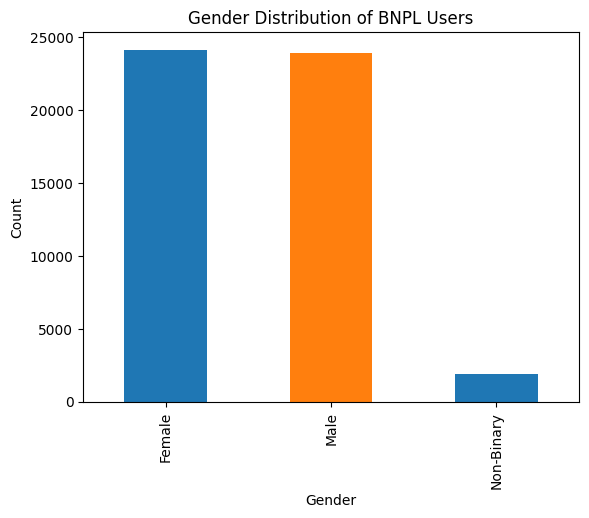

In [13]:
plt.figure()
df['Gender'].value_counts().plot(
    kind='bar',
    color=['#1f77b4', '#ff7f0e']
)
plt.title("Gender Distribution of BNPL Users")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

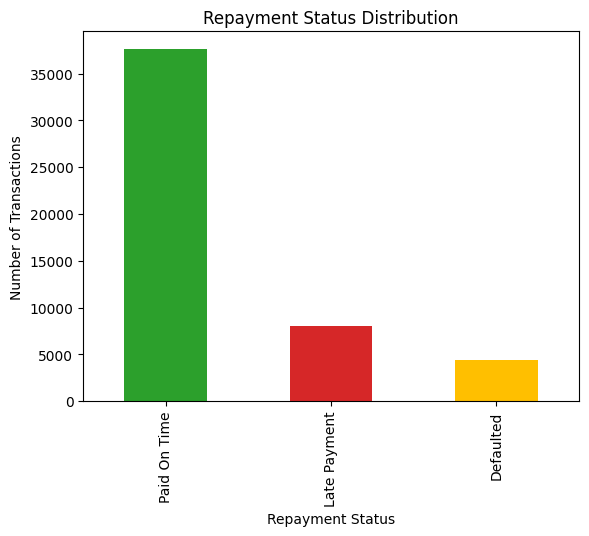

In [14]:
plt.figure()
df['Repayment_Status'].value_counts().plot(
    kind='bar',
    color=['#2ca02c', '#d62728', '#ffbf00']
)
plt.title("Repayment Status Distribution")
plt.xlabel("Repayment Status")
plt.ylabel("Number of Transactions")
plt.show()

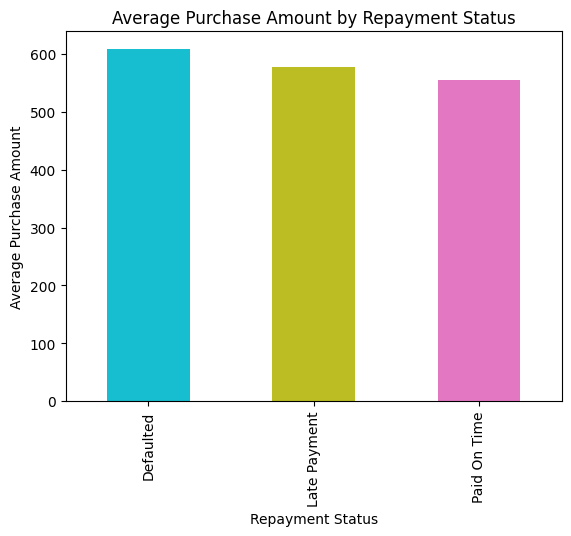

In [15]:
plt.figure()
df.groupby('Repayment_Status')['Purchase_Amount'].mean().plot(
    kind='bar',
    color=['#17becf', '#bcbd22', '#e377c2']
)
plt.title("Average Purchase Amount by Repayment Status")
plt.xlabel("Repayment Status")
plt.ylabel("Average Purchase Amount")
plt.show()

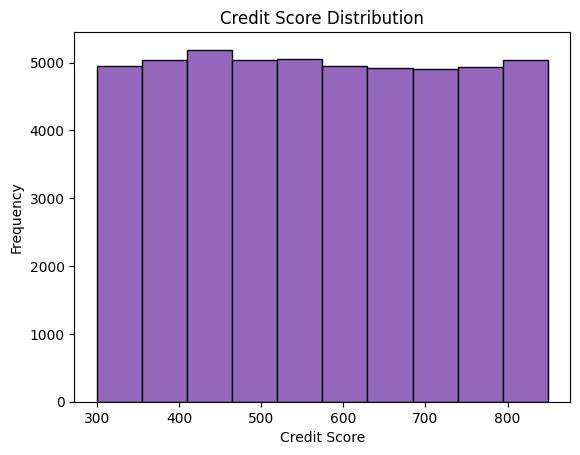

In [16]:
plt.figure()
plt.hist(
    df['Credit_Score'],
    bins=10,
    color='#9467bd',
    edgecolor='black'
)
plt.title("Credit Score Distribution")
plt.xlabel("Credit Score")
plt.ylabel("Frequency")
plt.show()

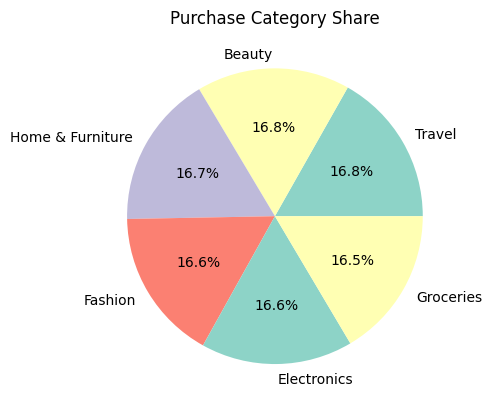

In [17]:
plt.figure()
df['Purchase_Category'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['#8dd3c7', '#ffffb3', '#bebada', '#fb8072']
)
plt.title("Purchase Category Share")
plt.ylabel("")
plt.show()

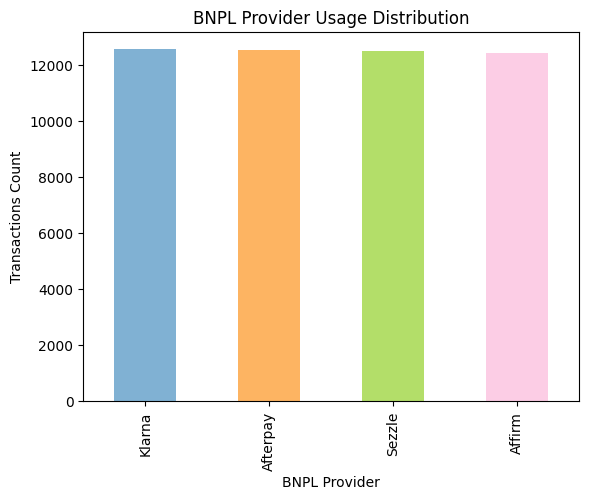

In [18]:
plt.figure()
df['BNPL_Provider'].value_counts().plot(
    kind='bar',
    color=['#80b1d3', '#fdb462', '#b3de69', '#fccde5']
)
plt.title("BNPL Provider Usage Distribution")
plt.xlabel("BNPL Provider")
plt.ylabel("Transactions Count")
plt.show()


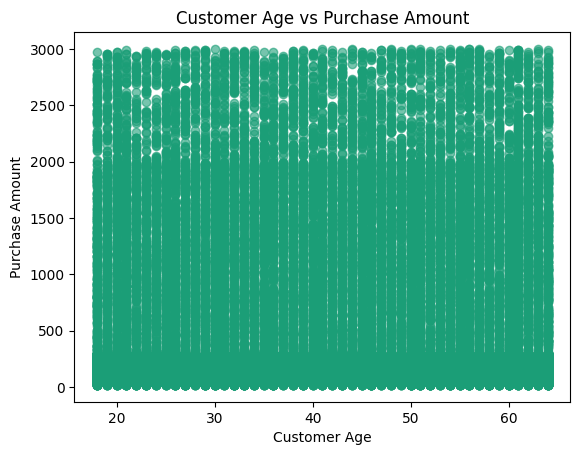

In [19]:
plt.figure()
plt.scatter(
    df['Customer_Age'],
    df['Purchase_Amount'],
    alpha=0.6,
    color='#1b9e77'
)
plt.title("Customer Age vs Purchase Amount")
plt.xlabel("Customer Age")
plt.ylabel("Purchase Amount")
plt.show()

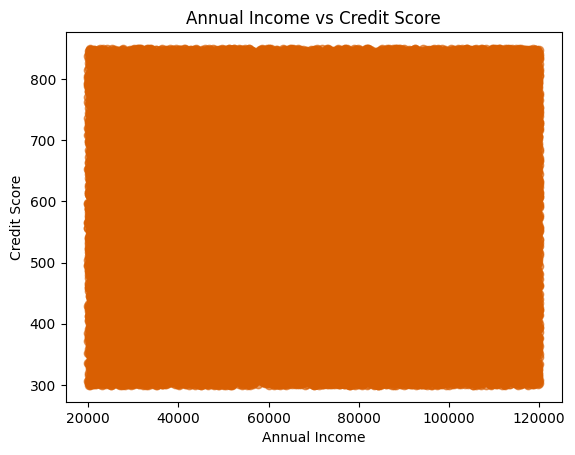

In [20]:
plt.figure()
plt.scatter(
    df['Annual_Income'],
    df['Credit_Score'],
    alpha=0.6,
    color='#d95f02'
)
plt.title("Annual Income vs Credit Score")
plt.xlabel("Annual Income")
plt.ylabel("Credit Score")
plt.show()

In [21]:
print(df['Repayment_Status'].value_counts())


Repayment_Status
Paid On Time    37612
Late Payment     8009
Defaulted        4379
Name: count, dtype: int64


## Feature engg

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

In [23]:
df['Repayment_Binary'] = df['Repayment_Status'].apply(
    lambda x: 0 if x == 0 else 1
)


In [24]:
df['Income_Purchase_Ratio'] = df['Purchase_Amount'] / df['Annual_Income']
df['Credit_Income_Ratio'] = df['Credit_Score'] / df['Annual_Income']


In [25]:
df_encoded = pd.get_dummies(
    df,
    columns=['Gender', 'Purchase_Category', 'BNPL_Provider'],
    drop_first=True
)

In [26]:
X = df_encoded.drop(
    columns=['Transaction_ID', 'Repayment_Status', 'Repayment_Binary']
)
y = df_encoded['Repayment_Binary']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
rf_model = RandomForestClassifier(
    n_estimators=400,
    max_depth=12,
    min_samples_split=10,
    class_weight='balanced',
    random_state=42
)

print("\n🤖 Training Improved Random Forest Model...")
rf_model.fit(X_train, y_train)


🤖 Training Improved Random Forest Model...


RandomForestClassifier(class_weight='balanced', max_depth=12,
                       min_samples_split=10, n_estimators=400, random_state=42)

In [30]:
y_pred = rf_model.predict(X_test)

In [31]:
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"\n✅ Model Accuracy: {accuracy:.2f}%\n")

print(
    classification_report(
        y_test,
        y_pred,
        labels=[0, 1],
        target_names=['Paid On Time', 'Risk'],
        zero_division=0
    )
)



✅ Model Accuracy: 100.00%

              precision    recall  f1-score   support

Paid On Time       0.00      0.00      0.00         0
        Risk       1.00      1.00      1.00     10000

    accuracy                           1.00     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       1.00      1.00      1.00     10000



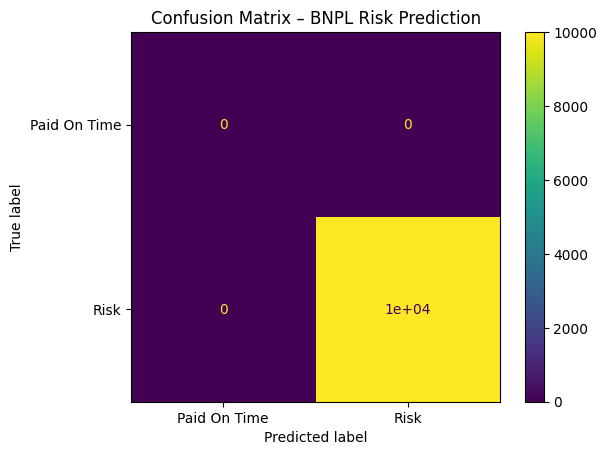

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(
    y_test,
    y_pred,
    labels=[0, 1]   # FORCE both classes
)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['Paid On Time', 'Risk']
)

disp.plot()
plt.title("Confusion Matrix – BNPL Risk Prediction")
plt.show()


## Thank you...pls upvote!!!!